<a href="https://colab.research.google.com/github/almsalahuddin/Data-Processing-and-Visualization/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAM 1 : CPSMA 4313 [Dr. Jacob's](https://github.com/nurfnick) Data processing visualization

### A L M SALAHUDDIN

##1.(a) Importing Libraries

First, Let's import the libraries to read data from the web.

In [ ]:
import requests
import pandas as pa
from bs4 import BeautifulSoup
import seaborn as sns

##Making Requests

Next, I will make request to collect all the data for one of my favourite TV shows from wikipedia web page.

In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mountains_by_elevation')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")

##Extracting Title

Now, I will find the title of the page.

In [ ]:
html_soup.title

<title>List of mountains by elevation - Wikipedia</title>

In [ ]:
len(html_soup.find_all('table'))

9

##Extracting Links

Next, I will be extracting all the links from the web page below.

In [ ]:
tables = html_soup.find_all('table',class_="wikitable")
tables[0].find_all('a')

[<a href="/wiki/Mount_Everest" title="Mount Everest">Mount Everest</a>,
 <a href="/wiki/Geography_of_Nepal" title="Geography of Nepal">Nepal</a>,
 <a href="/wiki/K2" title="K2">K2</a>,
 <a href="/wiki/Kangchenjunga" title="Kangchenjunga">Kangchenjunga</a>,
 <a href="/wiki/Lhotse" title="Lhotse">Lhotse</a>,
 <a href="/wiki/Makalu" title="Makalu">Makalu</a>,
 <a href="/wiki/Cho_Oyu" title="Cho Oyu">Cho Oyu</a>,
 <a href="/wiki/Dhaulagiri" title="Dhaulagiri">Dhaulagiri</a>,
 <a href="/wiki/Manaslu" title="Manaslu">Manaslu</a>,
 <a href="/wiki/Nanga_Parbat" title="Nanga Parbat">Nanga Parbat</a>,
 <a href="/wiki/Annapurna" title="Annapurna">Annapurna</a>,
 <a href="/wiki/Gasherbrum_I" title="Gasherbrum I">Gasherbrum I</a>,
 <a href="/wiki/Broad_Peak" title="Broad Peak">Broad Peak</a>,
 <a href="/wiki/Gasherbrum_II" title="Gasherbrum II">Gasherbrum II</a>,
 <a href="/wiki/Shishapangma" title="Shishapangma">Shishapangma</a>]

##1.(b) Tables

In [ ]:
df = pa.read_html(str(tables))[0]
df

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
1,K2,8611,28251,Karakoram,Pakistan/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...


Next, I will return only mountains in the ‘Himalayas’

In [ ]:
df.query('Range == "Himalayas"')

,Mountain,Metres,Feet,Range,Location and Notes
0,Mount Everest,8849,29032,Himalayas,Nepal/China
2,Kangchenjunga,8586,28169,Himalayas,Nepal/India
3,Lhotse,8516,27940,Himalayas,Nepal – Climbers ascend Lhotse Face in climbin...
4,Makalu,8485,27838,Himalayas,Nepal
5,Cho Oyu,8188,26864,Himalayas,"Nepal – Considered ""easiest"" eight-thousander"
6,Dhaulagiri,8167,26795,Himalayas,Nepal – Presumed world's highest from 1808-1838
7,Manaslu,8163,26781,Himalayas,Nepal
8,Nanga Parbat,8126,26660,Himalayas,Pakistan
9,Annapurna,8091,26545,Himalayas,Nepal – First eight-thousander to be climbed (...
13,Shishapangma,8027,26335,Himalayas,China


##1.(c) Barchart

Lets create a barchart of the Ranges.

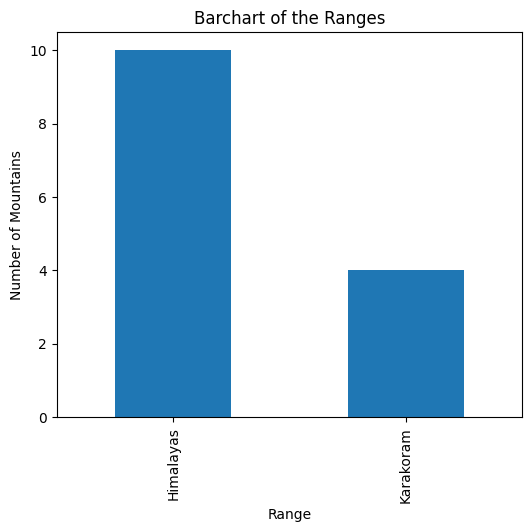

In [ ]:
dfg = df.groupby(['Range'])['Range'].count()

dfg.plot(kind='bar', title='Barchart of the Ranges', ylabel='Number of Mountains',
         xlabel='Range', figsize=(6, 5))

##1.(d) Box-Plot

Now, I will be ploting a box-plot of the height in Feet.

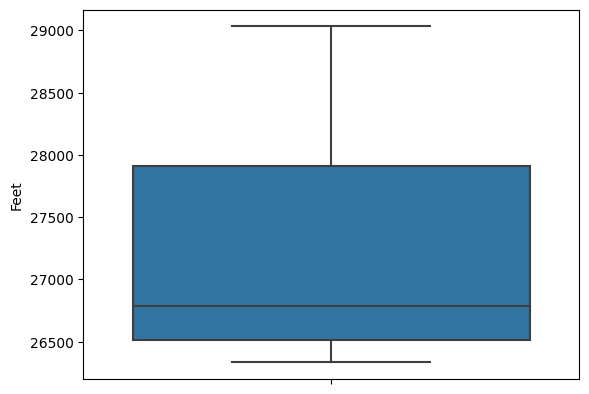

In [ ]:
sns.boxplot(y= 'Feet', data = df)

##1(e) The mean, standard deviation and five number summary of the height in Feet

In [ ]:
df.Feet.mean()

27178.214285714286

In [ ]:
df.Feet.mean()

27178.214285714286

In [ ]:
df.Feet.describe()[3:]

min    26335.0
25%    26518.0
50%    26788.0
75%    27914.5
max    29032.0
Name: Feet, dtype: float64

In [ ]:
df.Feet.quantile(q = .75)

27914.5

In [ ]:
df.Feet.min()

26335

##1.(f) The mean and median of mountains when grouped by their Range.

In [ ]:
df.groupby(by = 'Range').agg(['mean','median'])

Metres             Feet         
              mean  median     mean   median
Range                                       
Himalayas  8319.80  8177.5  27295.9  26829.5
Karakoram  8194.25  8065.5  26884.0  26461.5

#BigQuery public dataset ‘chicago taxi trips.taxi trips’ using the Colab and SQL interface.

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


##2.(a) How many rows are in the dataset?

Now. I will calculate the number of rows are in the dataset.

In [ ]:
%%bigquery --project data-viz-bigquery
SELECT 
  COUNT(*) as total_rows
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`

,total_rows
0,198792903


There are total 198792903 number of rows in this dataset


##2.(b) What is the average trip total based on payment type?

Next, I will the average trip total based on payment type.

In [ ]:
%%bigquery --project data-viz-bigquery
SELECT payment_type as payment_type, AVG(trip_total) as average_trip_total
 From `bigquery-public-data.chicago_taxi_trips.taxi_trips`
 GROUP BY Payment_type

,payment_type,average_trip_total
0,Unknown,17.649893
1,Mobile,20.339910
2,No Charge,15.836177
3,Cash,12.265548
4,Dispute,15.496588
5,Pcard,10.116931
6,Way2ride,16.639366
7,Split,18.788039
8,Prepaid,22.377662
9,Credit Card,20.524892


##2.(c) How many trips, that had a non-zero recorded time, were above the average time?

Now, I will be calculating the number of trips had non-zero recorded time and were above the average time.

In [ ]:
%%bigquery --project data-viz-bigquery
SELECT COUNT(*) as non_zero_time_of_trips_above_avg_time
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE trip_seconds !=0 and trip_seconds > (SELECT AVG(trip_seconds) as avg_seconds 
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`)

,non_zero_time_of_trips_above_avg_time
0,62143014


# Questions about the exam

##Question: Approximately how long did you work on this exam?

Answer: I worked around 3.5 hours on this. Question number 1.c bar-chart of the range took me longest because every-time it was showing error or not printing the appropriate chart. Finally I found out from one of your GitHub repository and finally worked perfectly.

##Question: Which was the hardest and easiest topic from this section?

Answer: As I said bar-chart took me longest time. It wasn’t that hard and I knew what the output should be but it just wasn’t giving me appropriate chart but question number 2.c would be hardest to understand. I wasn’t able to fond out the way of getting the right output. After researching all of your GitHub work I finally found out the way to solve the question. Other than these 2 questions everything else was pretty easy to me and hopefully I have everything correctly.

##Question: Which method of gathering data are you most excited to use again?

Answer: Big quarry-SQL method of gathering data is the most exited topic that I would love to be working more in future. This is so easy and convenient way to gather any specific data from a large public dataset.

##References

1.(a),(b): https://github.com/almsalahuddin/Data-Processing-and-Visualization/blob/main/HTML_Tables.ipynb

1.(c),(d),(e): https://github.com/nurfnick/Data_Viz/blob/main/01_Python.ipynb

1.(f): https://github.com/nurfnick/Data_Viz/blob/main/02_Pandas.ipynb

2.(a): https://github.com/nurfnick/Data_Viz/blob/main/03_SQL.ipynb

2.(b),(c): https://github.com/nurfnick/Data_Viz/blob/main/04_SQL_Essentials.ipynb

https://github.com/nurfnick/Data_Viz/blob/main/05_SQL_SubQuery.ipynb

“I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from the course.”
